In [1]:
# %load ../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.feature_selection import SelectFromModel
from sklearn import neighbors, metrics, model_selection
import sklearn.tree as tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

In [2]:
datos = pd.read_csv('online_shoppers_intention.csv')

datos_ok = datos.copy()
print(datos_ok.head())
categorico = ['Month','Weekend','VisitorType','Revenue']



for i,val in enumerate(datos_ok.columns):
    if val in categorico:
        labels = datos_ok[val].astype('category').cat.categories.tolist()
        dict_make = {val : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
        datos_ok[val].replace(dict_make[val], inplace=True)

X_all = np.array(datos_ok.drop(columns = 'Revenue').copy())
y_all = np.array(pd.factorize(datos_ok['Revenue'])[0])

   Administrative  Administrative_Duration  Informational  \
0             0.0                      0.0            0.0   
1             0.0                      0.0            0.0   
2             0.0                     -1.0            0.0   
3             0.0                      0.0            0.0   
4             0.0                      0.0            0.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0             1.0                 0.000000   
1                     0.0             2.0                64.000000   
2                    -1.0             1.0                -1.000000   
3                     0.0             2.0                 2.666667   
4                     0.0            10.0               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

In [3]:
## Month,VisitorType,Weekend.

Eliminamos los ejemplos con valores desconocidos

In [4]:
mascara = np.isnan(X_all)
mascara = np.sum(mascara,axis=1).reshape(-1,1).astype("bool")
mascara = mascara == False

X = X_all[mascara.flatten()]
y = y_all[mascara.flatten()]
print('se ha eliminado', len(X_all)-len(X),'ejemplos.')

se ha eliminado 14 ejemplos.


Visualizamos el numero de elementos de cada clase

In [5]:
Xpos = X[y == 1]
Xneg = X[y == 0]
print('hay',len(Xpos),'positivos')
print('hay',len(Xneg),'negativos')

hay 1908 positivos
hay 10408 negativos


# Entrenamiento con datos sin procesar

entrenamos un KNN con los datos sin procesar:

In [24]:
np.random.seed(12)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7)

clf = neighbors.KNeighborsClassifier()
clf.fit(X_train,y_train)

predTrain = clf.predict(X_train)
accTrainKNN = round(metrics.accuracy_score(y_train,predTrain)*100,2)
print('El rendimiento en entrenamiento con todas las variables es el {}%'.format(accTrainKNN))

predTest = clf.predict(X_test)
accTestKNN = round(metrics.accuracy_score(y_test,predTest)*100,2)
print('El rendimiento en test con todas las variables es el {}%'.format(accTestKNN))

El rendimiento en entrenamiento con todas las variables es el 89.37%
El rendimiento en test con todas las variables es el 86.25%


entrenamos un arbol de desicion con los datos sin procesar:

In [25]:
np.random.seed(12)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7)

clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)

predTrain = clf.predict(X_train)
accTrainDT = round(metrics.accuracy_score(y_train,predTrain)*100,2)
print('El rendimiento en entrenamiento con todas las variables es el {}%'.format(accTrainDT))

predTest = clf.predict(X_test)
accTestDT = round(metrics.accuracy_score(y_test,predTest)*100,2)
print('El rendimiento en test con todas las variables es el {}%'.format(accTestDT))

El rendimiento en entrenamiento con todas las variables es el 100.0%
El rendimiento en test con todas las variables es el 85.9%


entrenamos un random forest con los datos sin procesar: 

In [26]:
np.random.seed(12)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7)

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

predTrain = clf.predict(X_train)
accTrainRF = round(metrics.accuracy_score(y_train,predTrain)*100,2)
print('El rendimiento en entrenamiento con todas las variables es el {}%'.format(accTrainRF))

predTest = clf.predict(X_test)
accTestRF = round(metrics.accuracy_score(y_test,predTest)*100,2)
print('El rendimiento en test con todas las variables es el {}%'.format(accTestRF))

C:\Users\Hanwei\Anaconda3\envs\py37machlearn\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


El rendimiento en entrenamiento con todas las variables es el 98.9%
El rendimiento en test con todas las variables es el 90.15%


entrenamos un SVM con los datos sin procesar: 

In [27]:
np.random.seed(12)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7)

clf = LinearSVC()
clf.fit(X_train,y_train)

predTrain = clf.predict(X_train)
accTrainSVM = round(metrics.accuracy_score(y_train,predTrain)*100,2)
print('El rendimiento en entrenamiento con todas las variables es el {}%'.format(accTrainSVM))

predTest = clf.predict(X_test)
accTestSVM = round(metrics.accuracy_score(y_test,predTest)*100,2)
print('El rendimiento en test con todas las variables es el {}%'.format(accTestSVM))

El rendimiento en entrenamiento con todas las variables es el 69.63%
El rendimiento en test con todas las variables es el 68.44%


C:\Users\Hanwei\Anaconda3\envs\py37machlearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# Entrenamiento con datos sin Outliers

In [14]:
def calcularMediaDesviacion(datos):
    media = datos.mean(axis=0)
    desviacion = datos.std(axis=0)
    return media,desviacion

In [15]:
def deteccionOutliers(datos,media,desviacion,k=2):
    variablesOutliers = (datos < (media - k*desviacion)) | (datos > (media + k*desviacion))
    mascaraOutliers = variablesOutliers.sum(axis=1,dtype=bool)
    indicesOutliers = np.array(range(len(datos)))[mascaraOutliers]
    return indicesOutliers

datos numericas.

In [16]:
index_col_num = np.ones(len(datos_ok.columns))

for i,val in enumerate(datos_ok.columns):

    if val in categorico:
        index_col_num[i] = 0

## no cogemos la ultima variable porque es la clase
index_col_num = index_col_num[:-1].astype('bool')

In [17]:
media,desviacion = calcularMediaDesviacion(X.T[index_col_num].T)

indicesOutliers = deteccionOutliers(X.T[index_col_num].T,media,desviacion)
print('existe',len(indicesOutliers), 'filas de Outliers.')

existe 5715 filas de Outliers.


In [19]:
# Borrado de los ejemplos con outliers
XsinOutliers = np.delete(X, indicesOutliers, axis=0)
YsinOutliers = np.delete(y, indicesOutliers, axis=0)
numFilas = len(XsinOutliers)
print('se ha borrado',len(indicesOutliers), 'filas.')
print('ejemplos sin outliers:',numFilas, 'filas.')

se ha borrado 5715 filas.
ejemplos sin outliers: 6601 filas.


In [21]:
Xpos = XsinOutliers[YsinOutliers == 1]
Xneg = XsinOutliers[YsinOutliers == 0]
print('de los cuales hay' ,len(Xpos),'de clase la positiva y',len(Xneg),'de la clase negativa')

de los cuales hay 820 de clase la positiva y 5781 de la clase negativa


entrenamos un KNN con los datos sin outliers:

In [28]:
np.random.seed(12)

X_train, X_test, y_train, y_test = model_selection.train_test_split(XsinOutliers, YsinOutliers, train_size=0.7)

clf = neighbors.KNeighborsClassifier()
clf.fit(X_train,y_train)

predTrain = clf.predict(X_train)
accTrainKNNsinOutliers = round(metrics.accuracy_score(y_train,predTrain)*100,2)
print('El rendimiento en entrenamiento con todas las variables es el {}%'.format(accTrainKNNsinOutliers))

predTest = clf.predict(X_test)
accTestKNNsinOutliers = round(metrics.accuracy_score(y_test,predTest)*100,2)
print('El rendimiento en test con todas las variables es el {}%'.format(accTestKNNsinOutliers))

El rendimiento en entrenamiento con todas las variables es el 90.28%
El rendimiento en test con todas las variables es el 87.68%


entrenamos un arbol de desicion con los datos sin outliers:

In [29]:
np.random.seed(12)

X_train, X_test, y_train, y_test = model_selection.train_test_split(XsinOutliers, YsinOutliers, train_size=0.7)

clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)

predTrain = clf.predict(X_train)
accTrainDTsinOutliers = round(metrics.accuracy_score(y_train,predTrain)*100,2)
print('El rendimiento en entrenamiento con todas las variables es el {}%'.format(accTrainDTsinOutliers))

predTest = clf.predict(X_test)
accTestDTsinOutliers = round(metrics.accuracy_score(y_test,predTest)*100,2)
print('El rendimiento en test con todas las variables es el {}%'.format(accTestDTsinOutliers))

El rendimiento en entrenamiento con todas las variables es el 100.0%
El rendimiento en test con todas las variables es el 86.42%


entrenamos un random forest con los datos sin outliers: 

In [37]:
np.random.seed(12)

X_train, X_test, y_train, y_test = model_selection.train_test_split(XsinOutliers, YsinOutliers, train_size=0.7)

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

predTrain = clf.predict(X_train)
accTrainRFsinOutliers = round(metrics.accuracy_score(y_train,predTrain)*100,2)
print('El rendimiento en entrenamiento con todas las variables es el {}%'.format(accTrainRFsinOutliers))

predTest = clf.predict(X_test)
accTestRFsinOutliers = round(metrics.accuracy_score(y_test,predTest)*100,2)
print('El rendimiento en test con todas las variables es el {}%'.format(accTestRFsinOutliers))

C:\Users\Hanwei\Anaconda3\envs\py37machlearn\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


El rendimiento en entrenamiento con todas las variables es el 98.87%
El rendimiento en test con todas las variables es el 89.45%


entrenamos un SVM con los datos sin outliers:

In [31]:
np.random.seed(12)

X_train, X_test, y_train, y_test = model_selection.train_test_split(XsinOutliers, YsinOutliers, train_size=0.7)

clf = LinearSVC()
clf.fit(X_train,y_train)

predTrain = clf.predict(X_train)
accTrainSVMsinOutliers = round(metrics.accuracy_score(y_train,predTrain)*100,2)
print('El rendimiento en entrenamiento con todas las variables es el {}%'.format(accTrainSVMsinOutliers))

predTest = clf.predict(X_test)
accTestSVMsinOutliers = round(metrics.accuracy_score(y_test,predTest)*100,2)
print('El rendimiento en test con todas las variables es el {}%'.format(accTestSVMsinOutliers))

El rendimiento en entrenamiento con todas las variables es el 52.01%
El rendimiento en test con todas las variables es el 51.74%


C:\Users\Hanwei\Anaconda3\envs\py37machlearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## comparamos los resultados

In [41]:
print('KNN ******************************************************************************')

print('El rendimiento en entrenamiento con todas las variables es el {}%'.format(accTrainKNN))
print('El rendimiento en entrenamiento con las variables sin outliers es el {}%'.format(accTrainKNNsinOutliers))
print('El rendimiento en test con todas las variables es el {}%'.format(accTestKNN))
print('El rendimiento en test con las variables sin outliers es el {}%'.format(accTestKNNsinOutliers))
print('')

print('Decision Tree ********************************************************************')

print('El rendimiento en entrenamiento con todas las variables es el {}%'.format(accTrainDT))
print('El rendimiento en entrenamiento con las variables sin outliers es el {}%'.format(accTrainDTsinOutliers))
print('El rendimiento en test con todas las variables es el {}%'.format(accTestDT))
print('El rendimiento en test con las variables sin outliers es el {}%'.format(accTestDTsinOutliers))
print('')

print('Random Forest ********************************************************************')

print('El rendimiento en entrenamiento con todas las variables es el {}%'.format(accTrainRF))
print('El rendimiento en entrenamiento con las variables sin outliers es el {}%'.format(accTrainRFsinOutliers))
print('El rendimiento en test con todas las variables es el {}%'.format(accTestRF))
print('El rendimiento en test con las variables sin outliers es el {}%'.format(accTestRFsinOutliers))
print('')

print('SVM ******************************************************************************')

print('El rendimiento en entrenamiento con todas las variables es el {}%'.format(accTrainSVM))
print('El rendimiento en entrenamiento con las variables sin outliers es el {}%'.format(accTrainSVMsinOutliers))
print('El rendimiento en test con todas las variables es el {}%'.format(accTestSVM))
print('El rendimiento en test con las variables sin outliers es el {}%'.format(accTestSVMsinOutliers))


KNN ******************************************************************************
El rendimiento en entrenamiento con todas las variables es el 89.37%
El rendimiento en entrenamiento con las variables sin outliers es el 90.28%
El rendimiento en test con todas las variables es el 86.25%
El rendimiento en test con las variables sin outliers es el 87.68%

Decision Tree ********************************************************************
El rendimiento en entrenamiento con todas las variables es el 100.0%
El rendimiento en entrenamiento con las variables sin outliers es el 100.0%
El rendimiento en test con todas las variables es el 85.9%
El rendimiento en test con las variables sin outliers es el 86.42%

Random Forest ********************************************************************
El rendimiento en entrenamiento con todas las variables es el 98.9%
El rendimiento en entrenamiento con las variables sin outliers es el 98.87%
El rendimiento en test con todas las variables es el 90.15%
El

# Seleccion de variables

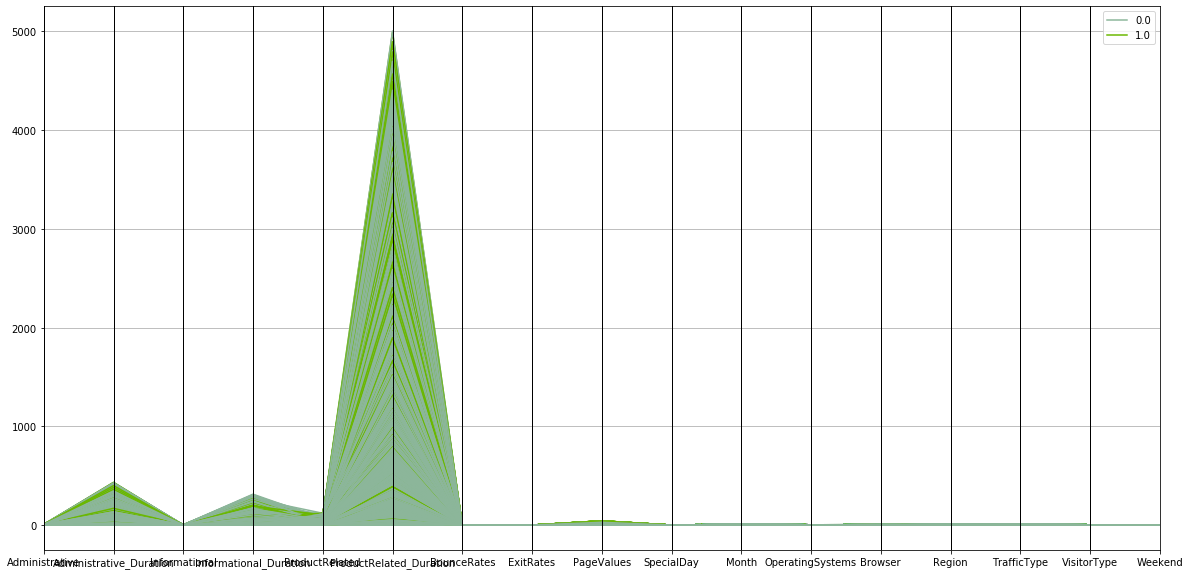

In [40]:
from pandas.plotting import parallel_coordinates
datos = np.hstack((XsinOutliers, YsinOutliers.reshape(-1,1)))

# Se crean los índices de los ejemplos
indice = list(range(0,len(XsinOutliers)))

# Se obtienen los nombres de las variables (entrada y salida)
columnas = list(datos_ok.columns[:-1])
columnas.append('clase')

# Se genera el DataFrame para poder aplicar la función parallel_coordinates
df = pd.DataFrame(data = datos, index=indice, columns=columnas)

# Se aplica la función parallel_coordinates sobre el DataFrame generado y usando la Clase como variable de discriminación
plt.figure(figsize=(20,10))
pd.plotting.parallel_coordinates(df,class_column='clase')

como podemos ver, la grafica no nos aporta mucha informacion, por lo tanto, seleccionaremos las variables mas importantes con la ayuda de la libreria feature_selection.

vamos a buscar los mejores variables para DT:

In [48]:
np.random.seed(12)
semilla = 123

clf = tree.DecisionTreeClassifier()

model = SelectFromModel(estimator=clf)
model.fit(XsinOutliers, YsinOutliers)

X_new = model.transform(XsinOutliers)

booleanas =  model.get_support()

# Se obtienen los nombres de las variables seleccionadas
variablesSeleccionadasDT = [datos_ok.columns[:-1][i] for i in range(len(datos_ok.columns)-1) if booleanas[i]==True]
print("Las variables seleccionadas son:", variablesSeleccionadasDT)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_new, YsinOutliers, train_size=0.7)

clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)

# Predicción de las clases de los datos de entrenamiento transformados
prediccionesTrain = clf.predict(X_train)
prediccionesTest = clf.predict(X_test)

# Se obtiene el accuracy en enrenamiento del nuevo árbol
accTrainDTfs =  round(metrics.accuracy_score(y_train,prediccionesTrain)*100,2)
print('El rendimiento en entrenamiento con todas las variables es el {}%'.format(accTrainDTfs))

# Obtenición del rendimiento con los datos de test
accTestDTfs =  round(metrics.accuracy_score(y_test,prediccionesTest)*100,2)
print('El rendimiento en test con todas las variables es el {}%'.format(accTestDTfs))

Las variables seleccionadas son: ['Administrative_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']
El rendimiento en entrenamiento con todas las variables es el 100.0%
El rendimiento en test con todas las variables es el 87.53%


vamos a buscar los mejores variables para SVM:

In [50]:
np.random.seed(12)
semilla = 123

clf = LinearSVC()

model = SelectFromModel(estimator=clf)
model.fit(XsinOutliers, YsinOutliers)

X_new = model.transform(XsinOutliers)

booleanas =  model.get_support()

# Se obtienen los nombres de las variables seleccionadas
variablesSeleccionadasDT = [datos_ok.columns[:-1][i] for i in range(len(datos_ok.columns)-1) if booleanas[i]==True]
print("Las variables seleccionadas son:", variablesSeleccionadasDT)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_new, YsinOutliers, train_size=0.7)

clf = LinearSVC()
clf.fit(X_train,y_train)

# Predicción de las clases de los datos de entrenamiento transformados
prediccionesTrain = clf.predict(X_train)
prediccionesTest = clf.predict(X_test)

# Se obtiene el accuracy en enrenamiento del nuevo árbol
accTrainSVMfs =  round(metrics.accuracy_score(y_train,prediccionesTrain)*100,2)
print('El rendimiento en entrenamiento con todas las variables es el {}%'.format(accTrainSVMfs))

# Obtenición del rendimiento con los datos de test
accTestSVMfs =  round(metrics.accuracy_score(y_test,prediccionesTest)*100,2)
print('El rendimiento en test con todas las variables es el {}%'.format(accTestSVMfs))

C:\Users\Hanwei\Anaconda3\envs\py37machlearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Las variables seleccionadas son: ['Administrative', 'BounceRates', 'ExitRates', 'SpecialDay', 'VisitorType', 'Weekend']
El rendimiento en entrenamiento con todas las variables es el 87.71%
El rendimiento en test con todas las variables es el 87.28%


C:\Users\Hanwei\Anaconda3\envs\py37machlearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [38]:

np.random.seed(12)
semilla = 123

X_new = model.transform(X)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_new[:,5], y, train_size=0.7)
# Llamada al constructor del árbol de decisión
arbolDecision = tree.DecisionTreeClassifier()

# Entrenamiento del árbol de decisión con los datos transformados
arbolDecision.fit(X_train.reshape(-1, 1),y_train.reshape(-1, 1))

# Predicción de las clases de los datos de entrenamiento transformados
prediccionesTrain = arbolDecision.predict(X_train.reshape(-1, 1))
prediccionesTest = arbolDecision.predict(X_test.reshape(-1, 1))

# Se obtiene el accuracy en enrenamiento del nuevo árbol
accuracyTrain =  round(metrics.accuracy_score(y_train,prediccionesTrain)*100,2)
print(accuracyTrain)
round(metrics.accuracy_score(y_train,predTrain)*100,2)
# Obtenición del rendimiento con los datos de test
accuracyTest =  round(metrics.accuracy_score(y_test,prediccionesTest)*100,2)
print(accuracyTest)


97.00730773692146
87.36129905277402


In [25]:
y[X[:,8] == 0].sum()

370

In [23]:
(y == 1).sum()

1908

In [28]:
(X[:,8] == 0).sum()

9586

In [52]:
#hanwei
# Se importan las 3 librerías necesarias para resolver el ejercicio
from sklearn import neighbors, metrics, model_selection
import sklearn.tree as tree

# Se fija la semilla de numpy para que la generación aleatoria siempre nos de los mismos números
np.random.seed(12)

# Lllamada a la función train_test_split y guardado del resultado
X_train, X_test, y_train, y_test = model_selection.train_test_split(X[:,8], y, train_size=0.7)

# Realizamos el proceso para KNN por lo que hay que llamar al constructor de dicho clasificador
clf = RandomForestClassifier(n_estimators=100, criterion='entropy',random_state=123)

# Llamada a la función que realiza el aprendizaje del clasificador
clf.fit(X_train.reshape(-1, 1),y_train.reshape(-1, 1))

# Llamada a la función que realiza la predicción de los datos de entrenamiento
predTrain = clf.predict(X_train.reshape(-1, 1))

# Llamada a la función que calcula el porcentaje de acierto para los datos de entrenamiento
accTrain = round(metrics.accuracy_score(y_train,predTrain)*100,2)
print('El rendimiento en entrenamiento con todas las variables es el {}%'.format(accTrain))

# Llamada a la función que realiza la predicción de los datos de test
predTest = clf.predict(X_test.reshape(-1, 1))
# Llamada a la función que calcula el porcentaje de acierto para los datos de test
accTest = round(metrics.accuracy_score(y_test,predTest)*100,2)
print('El rendimiento en test con todas las variables es el {}%'.format(accTest))

C:\Users\Hanwei\Anaconda3\envs\py37machlearn\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


El rendimiento en entrenamiento con todas las variables es el 97.01%
El rendimiento en test con todas las variables es el 87.36%


In [43]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(12)

X_new = model.transform(XsinOutliers)
print(X_new.shape)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_new, YsinOutliers, train_size=0.5)

bosqueAleatorio = RandomForestClassifier(n_estimators=100, criterion='entropy',random_state=123)
bosqueAleatorio.fit(X_train,y_train)
predTrain = bosqueAleatorio.predict(X_train)
predTest = bosqueAleatorio.predict(X_test)
accTrainRF = round(metrics.accuracy_score(y_train,predTrain)*100,2)
accTestRF = round(metrics.accuracy_score(y_test,predTest)*100,2)
print(accTrainRF,accTestRF)


(6601, 6)
100.0 90.06


In [48]:
X_new = model.transform(X)
print(X_new.shape)
pred = bosqueAleatorio.predict(X_new)
acc = round(metrics.accuracy_score(y,pred)*100,2)
acc

(12316, 6)


91.29

In [49]:
matrizConfusion = metrics.confusion_matrix(y,pred)

print(matrizConfusion)
print(metrics.classification_report(y, pred))

[[10005   403]
 [  670  1238]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10408
           1       0.75      0.65      0.70      1908

    accuracy                           0.91     12316
   macro avg       0.85      0.81      0.82     12316
weighted avg       0.91      0.91      0.91     12316



In [55]:
X_new = model.transform(XsinOutliers)
print(X_new.shape)
pred = clf.predict(X_new[:,5].reshape(-1, 1))
acc = round(metrics.accuracy_score(YsinOutliers,pred)*100,2)
acc


matrizConfusion = metrics.confusion_matrix(YsinOutliers,pred)
print(matrizConfusion)
print(metrics.classification_report(YsinOutliers, pred))

(6601, 6)
[[5713   68]
 [ 322  498]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5781
           1       0.88      0.61      0.72       820

    accuracy                           0.94      6601
   macro avg       0.91      0.80      0.84      6601
weighted avg       0.94      0.94      0.94      6601



In [56]:
np.random.seed(12)

modelo = RandomForestClassifier()

grid = {'n_estimators': [10,50,100], 
        'max_features': [1,'sqrt','log2',None], 
        'criterion': ['gini','entropy'],
        'max_depth': [5,10,None],
        'min_samples_split': [2,10,20]}

clasificadoresRF = model_selection.GridSearchCV(modelo, 
                                              grid, 
                                              scoring='accuracy', 
                                              cv=10)

clasificadoresRF.fit(XsinOutliers,YsinOutliers)

# Se muestra la mejor configuración y su accuracy asociado
print("mejor accuracy: ",clasificadoresRF.best_score_)
print("mejor configuracion: ",clasificadoresRF.best_params_)
print('********************************************************************************')

# Se muestra el accuracy obtenido para cada posible combinación de parámetros
resultadosMostrar = zip(clasificadoresRF.cv_results_['params'],clasificadoresRF.cv_results_['mean_test_score'],clasificadoresRF.cv_results_['mean_train_score'])
for params, mean_test_score, mean_train_score in resultadosMostrar:
    print("%0.3f (Train: %0.3f) for %r" % (mean_test_score, mean_train_score, params))
    print()

KeyboardInterrupt: 

In [ ]:
np.random.seed(12)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X[:,8], y, train_size=0.7)

clf = LinearSVC()
clf.fit(X_train.reshape(-1, 1),y_train)

predTrain = clf.predict(X_train.reshape(-1, 1))
accTrain = round(metrics.accuracy_score(y_train,predTrain)*100,2)
print('El rendimiento en entrenamiento con todas las variables es el {}%'.format(accTrain))

predTest = clf.predict(X_test.reshape(-1, 1))
accTest = round(metrics.accuracy_score(y_test,predTest)*100,2)
print('El rendimiento en test con todas las variables es el {}%'.format(accTest))